# DBSCAN

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [38]:
df =pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [40]:
dataset =df.iloc[:,[3,4]].values #iloc->[[stating row,end row],[staring column,end clunm]
dataset

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [41]:
x= dataset[:,0]
x

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

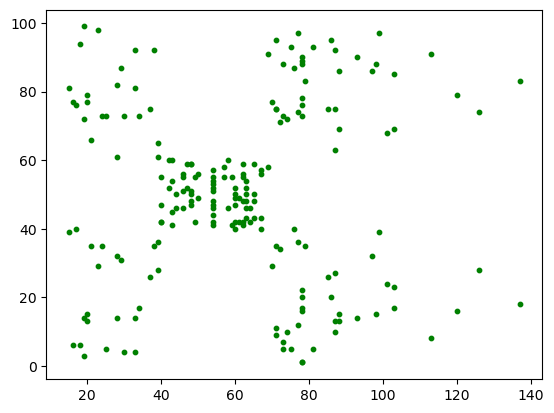

In [42]:
plt.scatter(dataset[:,0], dataset[:,1], s=10, c= "green") #dataset[:0] row:colum

In [43]:
from sklearn.cluster import DBSCAN

In [44]:
dbscan=DBSCAN(eps=5,min_samples=5)
y_pred= dbscan.fit_predict(dataset)
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [45]:
dd=dataset[y_pred == -1, 0]
dd1=dataset[y_pred == 0, 0]
dd

array([ 15,  16,  17,  18,  18,  19,  19,  19,  20,  20,  21,  21,  23,
        23,  24,  24,  25,  25,  28,  28,  28,  28,  29,  29,  30,  30,
        33,  33,  33,  33,  34,  34,  37,  37,  38,  38,  39,  39,  39,
        69,  70,  71,  72,  76,  77,  78,  78,  78,  78,  79,  81,  85,
        85,  86,  86,  87,  87,  87,  87,  87,  87,  88,  88,  88,  88,
        93,  93,  97,  97,  98,  98,  99,  99, 101, 101, 103, 103, 103,
       103, 113, 113, 120, 120, 126, 126, 137, 137], dtype=int64)

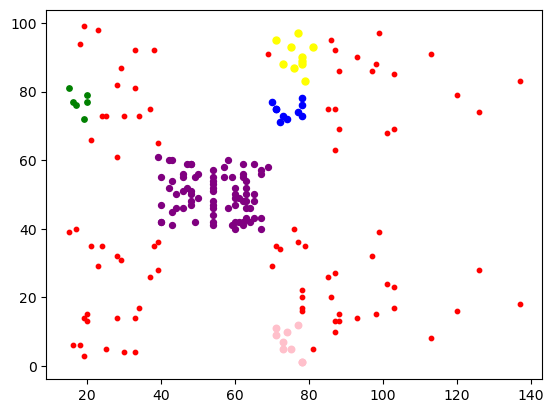

In [46]:
plt.scatter(dataset[y_pred==-1,0],dataset[y_pred==-1,1],s=10,color = "red")
plt.scatter(dataset[y_pred==0,0],dataset[y_pred==0,1],s=15,color = "green")
plt.scatter(dataset[y_pred==1,0],dataset[y_pred==1,1],s=18,color = "purple")
plt.scatter(dataset[y_pred==2,0],dataset[y_pred==2,1],s=20,color = "blue")
plt.scatter(dataset[y_pred==3,0],dataset[y_pred==3,1],s=22,color = "pink")
plt.scatter(dataset[y_pred==4,0],dataset[y_pred==4,1],s=25,color = "yellow")



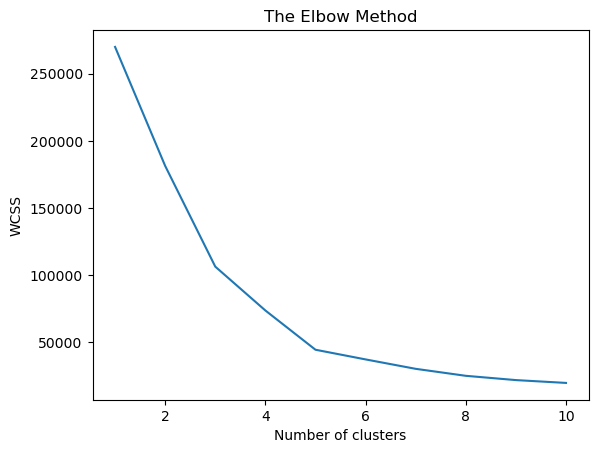

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()